# Introduction to Python and Jupyter Notebooks Review

To begin, be sure you understand how to move between cells in a Jupyter notebook and change them from code to markdown.  If you want additional work with styling markdown cells, please see the [cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).  In this part of the notebook, we will review some numpy basics and create some simple plots with Matplotlib.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/T8JGn4JRy4g?ecver=1" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

**Notes**

This notebook is using `%matplotlib notebook` instead of `%matplotlib inline`. The difference is you can build a chart across multiple cells. But you must always call `plt.figure()` to create a figure object. Everytime you plot, it will plot on the same figure, until you create another figure object. To plot multiple plots side by side use `plt.subplots()`

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

### NumPy and Matplotlib

To begin, let's play with some basic `matplotlib` plots and the NumPy random methods. For more information please consult the documentation [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html). 

In [3]:
a = np.random.randint(1, 20, 100)

<IPython.core.display.Javascript object>


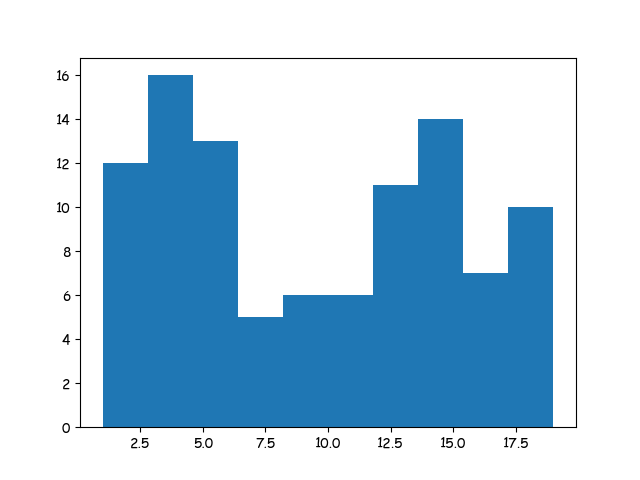

(array([12., 16., 13.,  5.,  6.,  6., 11., 14.,  7., 10.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

In [44]:
plt.figure()
plt.hist(a)

In [5]:
b = np.random.random(100)
c = np.random.normal(5, 10, 100)
d = np.random.binomial(100, .3, 100)

In [6]:
np.random.binomial?

In [7]:
a[:5]

array([17, 14,  2,  9, 13])

<IPython.core.display.Javascript object>


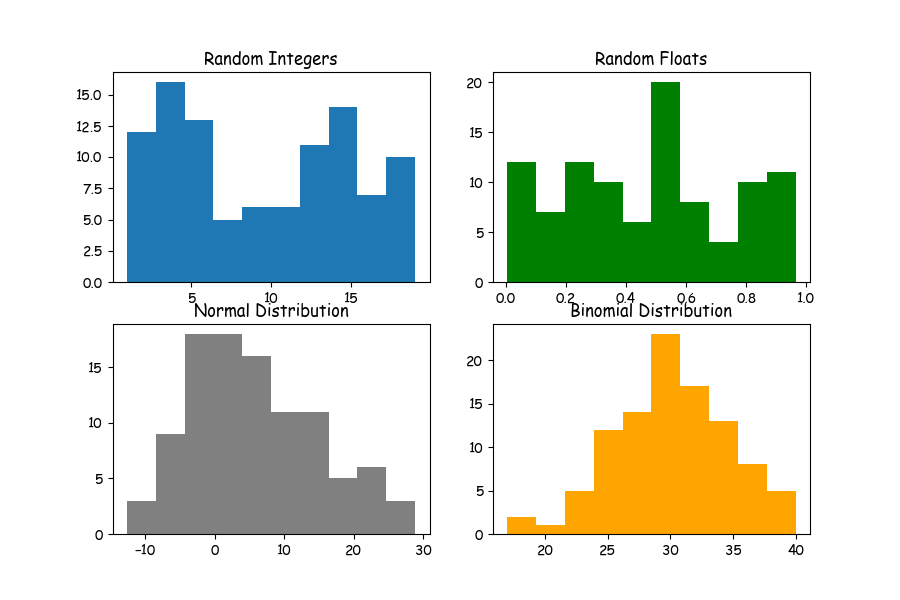

Text(0.5,1,'Binomial Distribution')

In [45]:
plt.figure(figsize = (9, 6))

plt.subplot(2, 2, 1)
plt.hist(a)
plt.title("Random Integers")

plt.subplot(2, 2, 2)
plt.hist(b, color = 'green')
plt.title("Random Floats")

plt.subplot(2, 2, 3)
plt.hist(c, color = 'grey')
plt.title("Normal Distribution")

plt.subplot(2, 2, 4)
plt.hist(d, color = 'orange')
plt.title("Binomial Distribution")

<IPython.core.display.Javascript object>


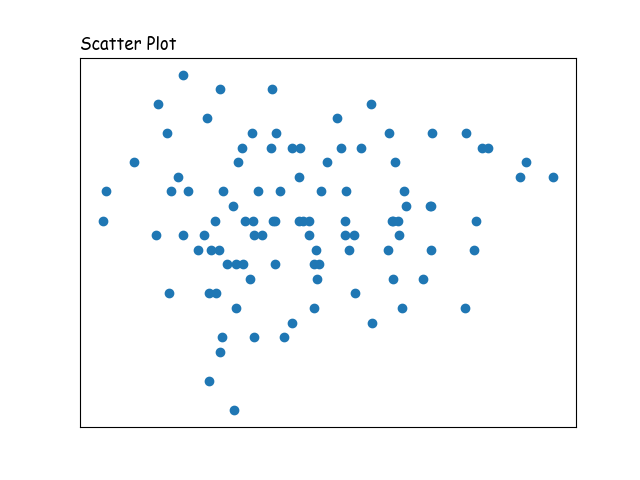

([], <a list of 0 Text yticklabel objects>)

In [46]:
plt.figure()
plt.scatter(c, d)
plt.title("Scatter Plot", loc = 'left')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


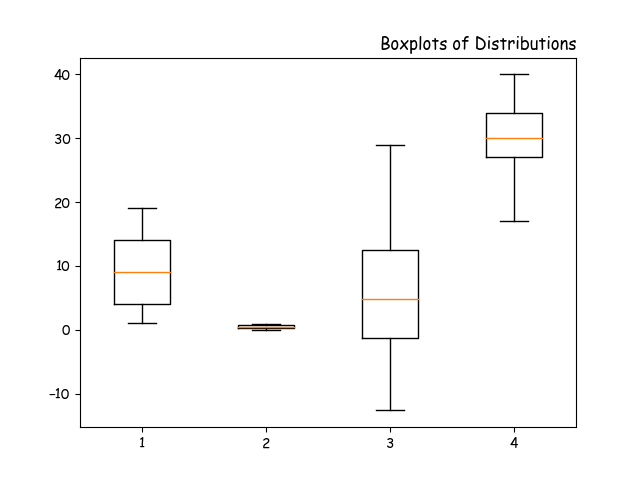

Text(1,1,'Boxplots of Distributions')

In [47]:
dists = [a, b, c, d]
plt.figure()
plt.boxplot(dists)
plt.title("Boxplots of Distributions", loc = "right")

<IPython.core.display.Javascript object>


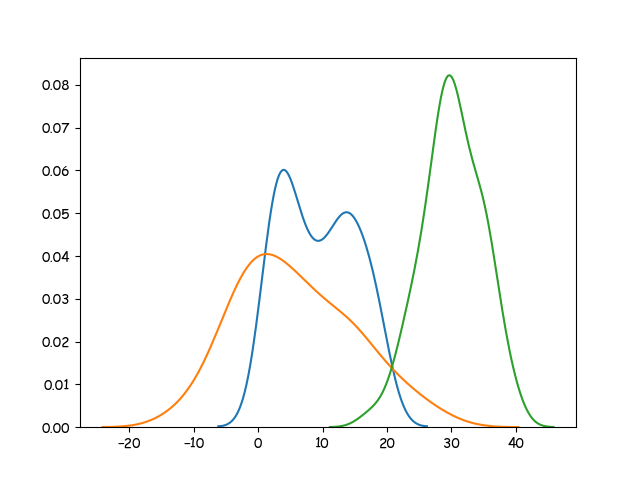

In [48]:
import seaborn as sns

plt.figure()
for i in [a,c,d]:
    sns.distplot(i, hist = False)

### Loading Data: Intro to Pandas

Now, we use the Pandas library to examine a variety of datasets.  Below, I create four different `DataFrame` objects from files.  The first three are from `.csv` files located in our **data** directory.  The final, is through the API from NYCOpenData.  We will continue to visit methods of accessing and structuring data, but to begin we use these two popular options.  

To load the `.csv` files, we provide Pandas with a path or url in the `.read_csv()` method.  I load all four datasets in what follows.

In [12]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/9Dsg9DQAU_g?ecver=1" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

In [13]:
nyc311data = pd.read_json('https://data.cityofnewyork.us/resource/fhrw-4uyv.json')

In [14]:
nyc311data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough', 'city',
       'closed_date', 'community_board', 'complaint_type', 'created_date',
       'cross_street_1', 'cross_street_2', 'descriptor', 'due_date',
       'facility_type', 'incident_address', 'incident_zip',
       'intersection_street_1', 'intersection_street_2', 'latitude',
       'location', 'location_type', 'longitude', 'open_data_channel_type',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')

In [15]:
nyc311data.dtypes

address_type                       object
agency                             object
agency_name                        object
bbl                               float64
borough                            object
city                               object
closed_date                        object
community_board                    object
complaint_type                     object
created_date                       object
cross_street_1                     object
cross_street_2                     object
descriptor                         object
due_date                           object
facility_type                      object
incident_address                   object
incident_zip                      float64
intersection_street_1              object
intersection_street_2              object
latitude                          float64
location                           object
location_type                      object
longitude                         float64
open_data_channel_type            

In [16]:
nyc311data.describe()

,bbl,incident_zip,latitude,longitude,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
count,7.880000e+02,994.000000,992.000000,992.000000,1.000000e+03,9.920000e+02,992.000000
mean,2.821326e+09,10871.207243,40.733111,-73.914738,3.954678e+07,1.007873e+06,206390.224798
std,1.204321e+09,546.764302,0.082205,0.079548,2.405281e+03,2.205989e+04,29947.421808
min,1.000330e+09,10001.000000,40.511559,-74.242685,3.954268e+07,9.167680e+05,125745.000000
25%,2.028605e+09,10453.000000,40.675169,-73.956432,3.954462e+07,9.963360e+05,185261.000000
50%,3.026485e+09,11209.500000,40.719661,-73.920550,3.954670e+07,1.006240e+06,201471.000000
75%,4.016903e+09,11364.750000,40.801983,-73.866021,3.954884e+07,1.021327e+06,231463.250000
max,5.073550e+09,11694.000000,40.907142,-73.729944,3.955084e+07,1.059177e+06,269790.000000


In [17]:
complaints = nyc311data[['complaint_type', 'borough', 'agency', 'agency_name']]

In [18]:
complaints.head()

,complaint_type,borough,agency,agency_name
0,Request Large Bulky Item Collection,BROOKLYN,DSNY,Department of Sanitation
1,Request Large Bulky Item Collection,MANHATTAN,DSNY,Department of Sanitation
2,Noise - Residential,QUEENS,NYPD,New York City Police Department
3,Noise - Residential,QUEENS,NYPD,New York City Police Department
4,Noise - Residential,QUEENS,NYPD,New York City Police Department


In [19]:
complaints.groupby(by = 'borough').size()

borough
BRONX            156
BROOKLYN         298
MANHATTAN        200
QUEENS           299
STATEN ISLAND     42
Unspecified        5
dtype: int64

In [20]:
complaints[complaints['borough'] =='BROOKLYN'].sort_values('complaint_type')[:10]

,complaint_type,borough,agency,agency_name
79,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
554,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
386,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
191,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
931,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
284,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
272,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
392,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
448,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department
712,Blocked Driveway,BROOKLYN,NYPD,New York City Police Department


In [21]:
BK_COMPLAIN = complaints[complaints['borough'] == 'BROOKLYN']['complaint_type'].value_counts()

<IPython.core.display.Javascript object>


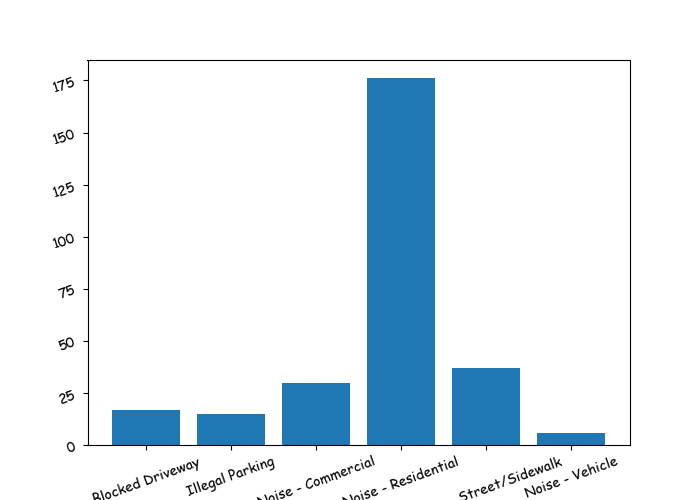

<Container object of 6 artists>

In [49]:
plt.figure(figsize = (7, 5))
plt.bar(BK_COMPLAIN.index[:6], BK_COMPLAIN[:6])

In [50]:
# rotate xticks
plt.tick_params(labelrotation = 20)

In [51]:
# default parameters
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use

<IPython.core.display.Javascript object>


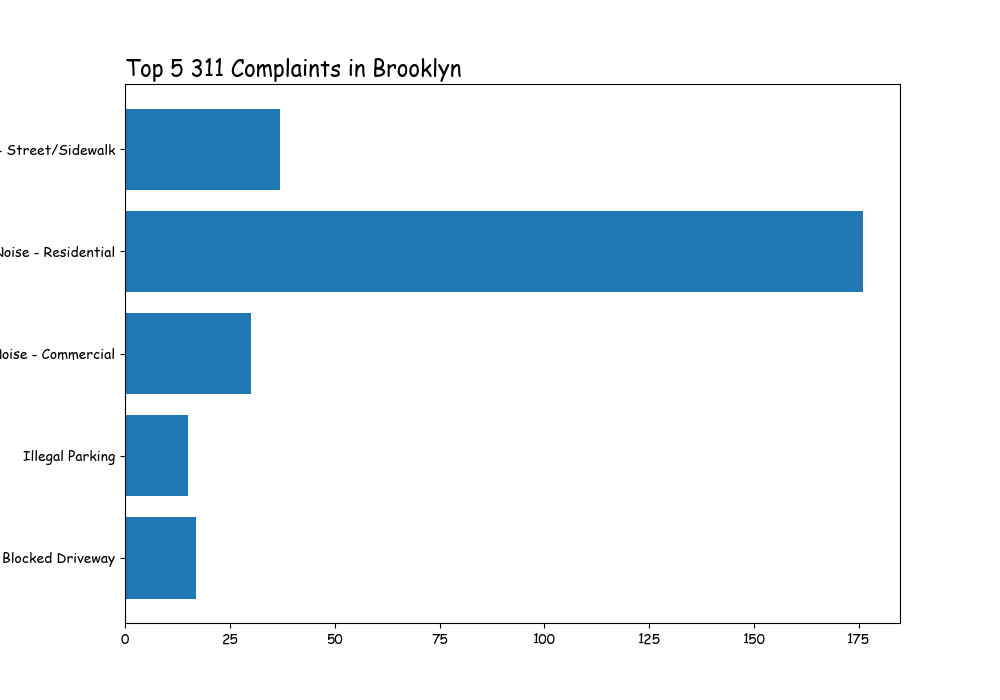

Text(0,1,'Top 5 311 Complaints in Brooklyn')

In [52]:
#  change one of the default params
plt.rcParams["font.family"] = "fantasy"

# new figure object inherets default change
plt.figure(figsize = (10, 7))
bars = plt.barh(BK_COMPLAIN.index[:5], BK_COMPLAIN[:5])
plt.title("Top 5 311 Complaints in Brooklyn", loc = 'left', fontsize = 16 )

<IPython.core.display.Javascript object>


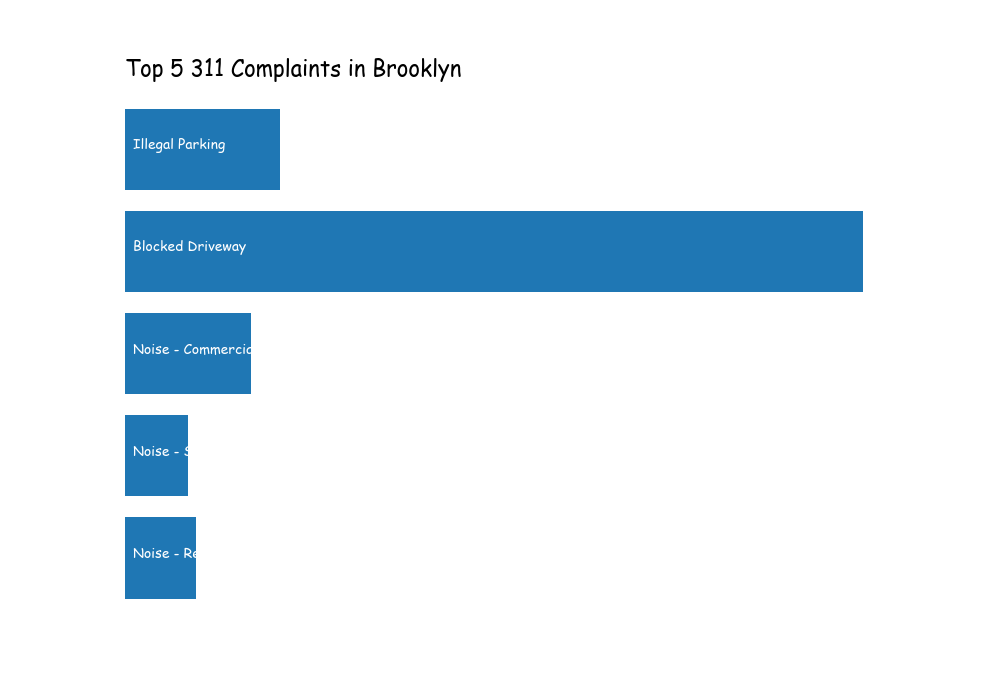

In [71]:
# beautify the plot above
## Tufte principle: want a high info-to-ink ratio

plt.figure(figsize = (10, 7))
bars = plt.barh(BK_COMPLAIN.index[:5], BK_COMPLAIN[:5])
plt.title("Top 5 311 Complaints in Brooklyn", loc = 'left', fontsize = 16 )

# label the bars
labels = BK_COMPLAIN.index
for i in range(5):
    label = labels[i]
    ## .gca() is get coordinate axis
    ### .text adds text to axis
    plt.gca().text(2, i, label, color = 'w', fontsize = 10)

# turn the ticks off
plt.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off', labelleft='off', labelbottom='off')

# turn frame off
## the frame is called "spine"
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [57]:
# save figure
plt.savefig('images/brooklyn_complaining.png')

### Titanic Manipulation

In [31]:
titanic = pd.read_csv('data/eda_data/titanic.csv')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic[titanic.pclass == 3][:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [33]:
titanic.sample(frac=0.1)[:5]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
775,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
282,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
535,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S


In [34]:
titanic.iloc[4:10]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
titanic.nlargest(10, 'age')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [36]:
titanic.nsmallest(10, 'age')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S


In [37]:
gender = titanic[['survived', 'sex']]

In [38]:
gender[gender['survived'] == 0].groupby('sex').size()

sex
female     81
male      468
dtype: int64

In [58]:
# gender.iloc[gender, ('survived' == 0)] 

In [40]:
gender[gender['survived'] == 1].groupby('sex').size()

sex
female    233
male      109
dtype: int64

### Rock Songs

In [41]:
rockin = pd.read_csv('data/eda_data/rocking.csv', index_col = 0)

In [42]:
rockin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 8 columns):
Song Clean      2230 non-null object
ARTIST CLEAN    2230 non-null object
Release Year    1653 non-null object
COMBINED        2230 non-null object
First?          2230 non-null int64
Year?           2230 non-null int64
PlayCount       2230 non-null int64
F*G             2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 156.8+ KB


In [43]:
rockin.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [59]:
rockin = rockin.rename({'First?': 'First', 'Year?': 'Year', 'F*G': 'fg'}, axis = 1)

In [60]:
null_release_mask = rockin['Release Year'].isnull()
rockin.loc[null_release_mask, 'Release Year'] = 0

In [61]:
rockin.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First,Year,PlayCount,fg
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,0,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [62]:
rockin['ARTIST CLEAN'].unique()[::10]

array(['.38 Special', 'Alannah Myles', 'Arlo Guthrie', 'Badfinger',
       'Billy Squier', 'Bob Dylan', 'Bruce Hornsby & The Range',
       'Charlie Daniels Band', 'Counting Crows', 'Dave Mason',
       'Derek & The Dominos', 'Don McLean', 'Edgar Winter Group',
       'Eurythmics', 'Fleetwood Mac', 'Genesis', "Gov't Mule",
       'Harold Faltermeyer', 'Hooters', 'James Gang', 'Jethro Tull',
       'John Fogerty', 'Junkyard', 'Lake', 'Local H', 'Meat Loaf',
       'Molly Hatchet', 'Neil Young', 'Ozark Mountain Daredevils',
       'Peter Gabriel', 'Queensryche', 'Rick Derringer', 'Roger Daltry',
       'Santana', 'Skid Row', 'Squeeze', 'Steve Winwood', 'Stu Nunnery',
       'Taxxi', "The B-52's", 'The Clash', 'The Kinks', 'The Outlaws',
       'The Traveling Wilburys', 'Tom Cochrane', 'U2', 'Warren Zevon',
       'Y&T'], dtype=object)

### figure settings

In [77]:
# change back to inline

%matplotlib inline
sns.set(style='ticks')

### who released the most songs?

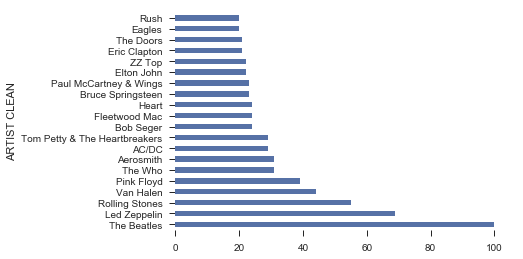

In [84]:
count_by_artist = rockin.groupby('ARTIST CLEAN')['Song Clean'].count().sort_values(ascending=False).head(20)
count_by_artist.plot.barh(color='#5671A6')
sns.despine(left=True, bottom=True)

### which year released the most songs?

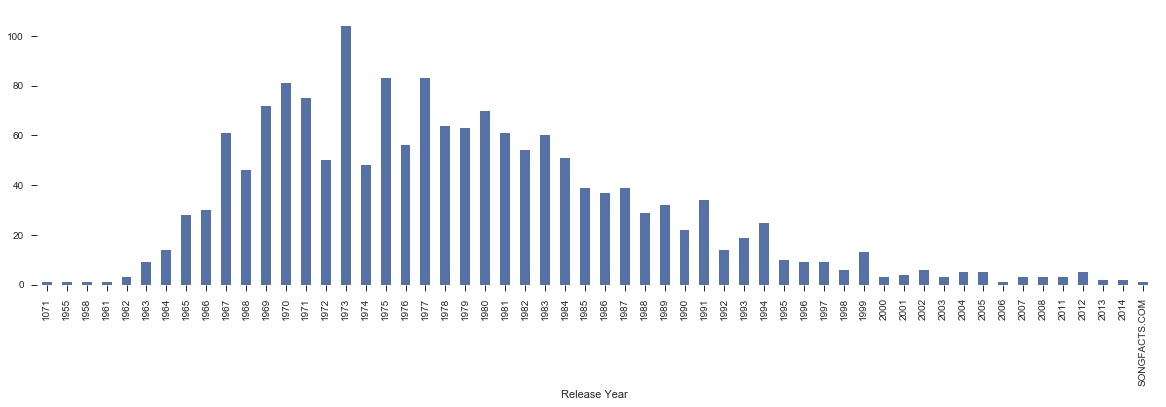

In [86]:
plt.figure(figsize=(20,5))
count_by_yr = rockin.groupby('Release Year')['Song Clean'].count()[1:]
count_by_yr.plot.bar(color='#5671A6')
sns.despine(left=True, bottom=True)

### who had the highest playcount?

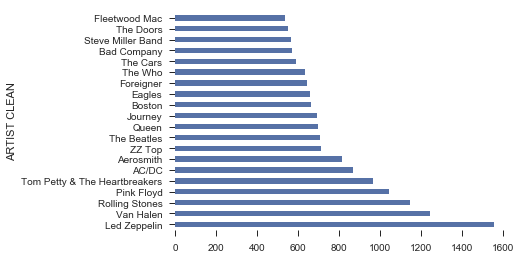

In [91]:
count_by_artist = rockin.groupby('ARTIST CLEAN')['PlayCount'].sum().sort_values(ascending=False).head(20)
count_by_artist.plot.barh(color='#5671A6')
sns.despine(left=True, bottom=True)

### which songs were most popular in the 80s?

In [110]:
rockin['Release Year'] = pd.to_numeric(rockin['Release Year'],errors='coerce')
rockin_80s = rockin[rockin['Release Year'].apply(lambda year: year in range(1980,1990))]

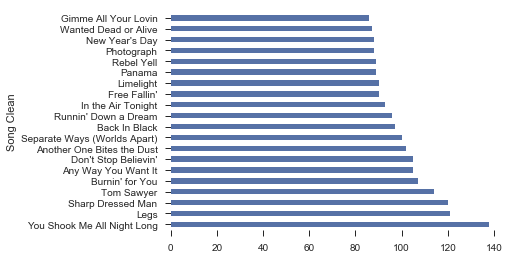

In [116]:
popular_songs_80s = rockin_80s.groupby('Song Clean')['PlayCount'].sum().sort_values(ascending=False).head(20)
popular_songs_80s.plot.barh(color='#5671A6')
sns.despine(left=True, bottom=True)

### which artists were most popular in the 80s?

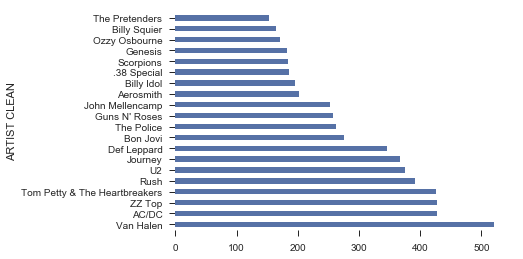

In [120]:
popular_artists_80s = rockin_80s.groupby('ARTIST CLEAN')['PlayCount'].sum().sort_values(ascending=False).head(20)
popular_artists_80s.plot.barh(color='#5671A6')
sns.despine(left=True, bottom=True)

### how many artists produced songs in each decade?

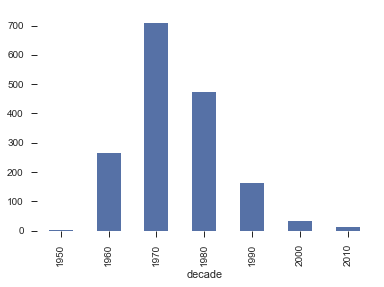

In [136]:
rockin_decade = rockin.copy()
rockin_decade.fillna(0,inplace=True)
rockin_decade['decade'] = rockin_decade['Release Year'].apply(lambda year: math.floor(year/10)*10)

artist_count_by_decade = rockin_decade.groupby('decade')['ARTIST CLEAN'].count()[2:]
artist_count_by_decade.plot.bar(color='#5671A6')
sns.despine(left=True, bottom=True)

In [133]:
rockin_decade.head()

# top song by playcount per year

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First,Year,PlayCount,fg,decade
0,Caught Up in You,.38 Special,1982.0,Caught Up in You by .38 Special,1,1,82,82,1980
1,Fantasy Girl,.38 Special,0.0,Fantasy Girl by .38 Special,1,0,3,0,0
2,Hold On Loosely,.38 Special,1981.0,Hold On Loosely by .38 Special,1,1,85,85,1980
3,Rockin' Into the Night,.38 Special,1980.0,Rockin' Into the Night by .38 Special,1,1,18,18,1980
4,Art For Arts Sake,10cc,1975.0,Art For Arts Sake by 10cc,1,1,1,1,1970


In [150]:
rockin_no_zeros = rockin[rockin['Release Year']!=0]
rockin_no_zeros = rockin_no_zeros.groupby(['Release Year','Song Clean'])['PlayCount'].sum().reset_index()
rockin_no_zeros.sort_values(by=['Release Year','PlayCount'],ascending=[True,False]).head()

,Release Year,Song Clean,PlayCount
0,1071.0,Levon,8
1,1955.0,Rock Around the Clock,1
2,1958.0,JOHNNY B. GOODE,2
3,1961.0,Cry For A Shadow,1
4,1962.0,Green Onions,4
